In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

# 1. Import the train datasets

In [2]:
X_train = pd.read_csv("A_Normalised_train_data.csv",index_col=0)
Y_train = pd.read_csv("A_Log_sales_train.csv",index_col=0)

In [3]:
Model_1 = Lasso()

# 2. Setup Pipeline

In [4]:
poly = PolynomialFeatures()
pca=PCA()
SLR = Model_1

In [5]:
# Step 1: Polynomial transform
# Step 2: PCA
# Step 3: Model
pipe = Pipeline(steps=[("poly",poly),("pca",pca),("SLR",SLR)])

In [6]:
param_grid = {
    "pca__n_components": [45, 100 ,150 ,170],
    "poly__degree":[1,2],
    "SLR__alpha":[0.1,0.5,8,10,100]
}

# 3. Setup GridSearch

In [7]:
score_metric = 'neg_mean_squared_error'
search = GridSearchCV(pipe,param_grid,
                      n_jobs=-1,
                      cv=10,
                      scoring=score_metric)

In [8]:
search.fit(X_train,Y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('pca', PCA()), ('SLR', Lasso())]),
             n_jobs=-1,
             param_grid={'SLR__alpha': [0.1, 0.5, 8, 10, 100],
                         'pca__n_components': [45, 100, 150, 170],
                         'poly__degree': [1, 2]},
             scoring='neg_mean_squared_error')

In [9]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=-0.921):
{'SLR__alpha': 0.1, 'pca__n_components': 170, 'poly__degree': 2}


In [10]:
df = pd.DataFrame(search.cv_results_)
df = df.sort_values(by=['rank_test_score'])
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_SLR__alpha,param_pca__n_components,param_poly__degree,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
7,28.714633,17.045697,0.561204,0.443765,0.1,170,2,"{'SLR__alpha': 0.1, 'pca__n_components': 170, ...",-0.712960,-0.710427,...,-0.833097,-0.976639,-0.718927,-0.675283,-0.740589,-0.858057,-0.854029,-0.920825,0.412079,1
5,24.273817,8.381576,0.515467,0.350540,0.1,150,2,"{'SLR__alpha': 0.1, 'pca__n_components': 150, ...",-0.755818,-0.746819,...,-0.868475,-0.999850,-0.736045,-0.702531,-0.750271,-0.856825,-0.875997,-0.931325,0.373085,2
4,0.546187,0.075523,0.076686,0.144181,0.1,150,1,"{'SLR__alpha': 0.1, 'pca__n_components': 150, ...",-0.874951,-0.868846,...,-1.065290,-1.092528,-0.740483,-0.833620,-0.884925,-0.940249,-0.910219,-0.935921,0.121012,3
6,0.343074,0.192828,0.061508,0.064569,0.1,170,1,"{'SLR__alpha': 0.1, 'pca__n_components': 170, ...",-0.874951,-0.868846,...,-1.065290,-1.092528,-0.740483,-0.833620,-0.884925,-0.940249,-0.910219,-0.935921,0.121012,3
2,1.919072,0.711206,0.080384,0.067687,0.1,100,1,"{'SLR__alpha': 0.1, 'pca__n_components': 100, ...",-0.884931,-0.890619,...,-1.073784,-1.122854,-0.759995,-0.856042,-0.906708,-0.954574,-0.941946,-0.944334,0.104838,5
3,19.897544,5.880964,0.533719,0.312903,0.1,100,2,"{'SLR__alpha': 0.1, 'pca__n_components': 100, ...",-0.899132,-0.881306,...,-1.024196,-1.165916,-0.851271,-0.853307,-0.903071,-0.991220,-1.036488,-0.960122,0.095362,6
0,0.924229,0.499763,0.029921,0.020782,0.1,45,1,"{'SLR__alpha': 0.1, 'pca__n_components': 45, '...",-0.896535,-0.907686,...,-1.084329,-1.127731,-0.760527,-0.879976,-0.939916,-0.981858,-1.002760,-0.964822,0.105097,7
11,26.121999,8.807491,0.632132,0.264773,0.5,100,2,"{'SLR__alpha': 0.5, 'pca__n_components': 100, ...",-0.987270,-0.979540,...,-1.196271,-1.262666,-0.876109,-0.978675,-1.005317,-1.044739,-1.150498,-1.051675,0.110972,8
13,33.272613,15.063978,0.697532,0.296964,0.5,150,2,"{'SLR__alpha': 0.5, 'pca__n_components': 150, ...",-0.961298,-0.960593,...,-1.164534,-1.227789,-0.846437,-0.920060,-0.946005,-1.012748,-1.121551,-1.063255,0.176684,9
15,36.748191,7.661587,0.988822,0.144420,0.5,170,2,"{'SLR__alpha': 0.5, 'pca__n_components': 170, ...",-0.962006,-0.960560,...,-1.164741,-1.228699,-0.845660,-0.917604,-0.946012,-1.013987,-1.121178,-1.063267,0.177148,10


# 4. Best Hyperparameter

In [11]:
parms = pd.DataFrame(df['params'])
for i in parms.iloc[0]:
    print(i)

{'SLR__alpha': 0.1, 'pca__n_components': 170, 'poly__degree': 2}


# 5. Evaluate Model $log(Sales)$

In [12]:
best_pca =parms.iloc[0][0]['pca__n_components']
best_degree=parms.iloc[0][0]['poly__degree']
best_alpha=parms.iloc[0][0]['SLR__alpha']

In [13]:
Model_2 = Lasso(alpha=best_alpha)

In [14]:
poly1 = PolynomialFeatures(degree=best_degree)

In [15]:
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X_train,Y_train,test_size=0.2,random_state=132)


In [16]:
pca1 = PCA(n_components=best_pca)
X_train1 = poly1.fit_transform(X_train1)
pca1.fit(X_train1)
PX_train1 = pca1.transform(X_train1)
SLR1 = Model_2
SLR1.fit(PX_train1,Y_train1)

Lasso(alpha=0.1)

In [17]:
pca2 = PCA(n_components=best_pca)
X_test1=poly1.fit_transform(X_test1)
pca2.fit(X_test1)
PX_test1 = pca2.transform(X_test1)

In [18]:
MSE(SLR1.predict(PX_test1),Y_test1)

1.8114623132862833

In [19]:
result = pd.DataFrame(np.exp(Y_test1))

In [20]:
result["Predicted_sales"] = np.exp(SLR1.predict(PX_test1))

In [21]:
MSE(result["sales"],result["Predicted_sales"])

1446.8948699865557

# 5.1 Model using original sales data

In [22]:
Model_3 = Lasso(alpha=best_alpha)

In [23]:
OY_train = pd.read_csv("A_sales_train.csv",index_col=0)

In [24]:
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(X_train,OY_train,test_size=0.2,random_state=132)

In [25]:
pca3 = PCA(n_components=best_pca)
X_train2 = poly1.fit_transform(X_train2)
pca3.fit(X_train2)
PX_train2 = pca3.transform(X_train2)
SLR2 = Model_3
SLR2.fit(PX_train2,Y_train2)

Lasso(alpha=0.1)

In [26]:
pca4 = PCA(n_components=best_pca)
X_test2=poly1.fit_transform(X_test2)
pca4.fit(X_test2)
PX_test2 = pca4.transform(X_test2)

In [27]:
MSE(SLR2.predict(PX_test2),Y_test2)

1690.6596395045678

#### Notably model trained on log(Sales) has lower out-of-sample MSE than model with unmodified Sales

# 6. Inventory Decision

In [28]:
residual = result['sales']-result['Predicted_sales']

In [29]:
Price=20
Cost=12
Salvage=8
Over=Cost - Salvage
Under=Price - Cost
Over, Under

(4, 8)

### QQ plot to explore the distribution of residual

#### Normal Distribution

In [30]:
import scipy.stats as sct

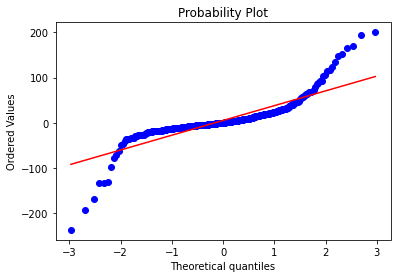

In [31]:
import scipy
scipy.stats.probplot(residual, dist="norm", plot=plt)
plt.show()

In [32]:
s = residual.std()
opt_dec_N=np.ceil(sct.norm.ppf(Under/(Under+Over))*s + result['Predicted_sales'])

#### Exponential Distribution

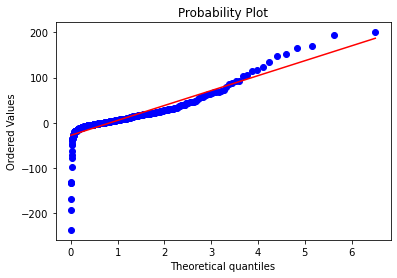

In [33]:
scipy.stats.probplot(residual, dist="expon", plot=plt)
plt.show()

In [34]:
opt_dec_E=np.ceil((-result['Predicted_sales'])*np.log(1-(Under/(Under+Over))))

#### Empirical Distribution

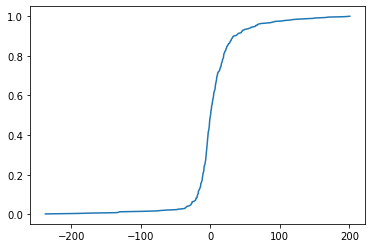

In [35]:
size = residual.shape[0]
step=1/size
jumps = [step*i for i in range(1,size+1)]
Sample = sorted(residual)
plt.plot(Sample,jumps)

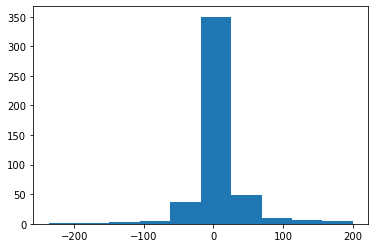

In [36]:
plt.hist(Sample)
plt.show()

In [37]:
def inv(sample,jump,area):
    size = len(sample)
    i=0
    temp=jump[i]
    while temp<area:
        i+=1
        temp=jump[i]
        
    return sample[i]

In [38]:
offset = inv(Sample,jumps,2/3)
offset

8.194067869063701

In [39]:
opt_dec_B = np.ceil(result['Predicted_sales']+offset)

# 7. Out-of-samples Profit

In [40]:
#max profit for test data set
max_profit = result['sales'].sum()*(Price-Cost)
max_profit

82096.0

In [41]:
def profit(demand,inv):
    return (Price-Salvage)*np.minimum(demand,inv)-(Cost-Salvage)*inv

In [42]:
#Profit (Normal)
profit_lst_N = profit(result['sales'],opt_dec_N)
profit_lst_N.sum()

20648.0

In [43]:
#Profit (Exponential)
profit_lst_E = profit(result['sales'],opt_dec_E)
profit_lst_E.sum()

19920.0

In [44]:
#Profit (Empirical)
profit_lst_B = profit(result['sales'],opt_dec_B)
profit_lst_B.sum()

23252.0

# 8. K-Fold Cross Validation

### Repeat steps 5,6,7 with 10-fold cross validation

In [45]:
Model_4=Lasso(alpha=best_alpha)

In [46]:
from sklearn.model_selection import KFold
k=10
kf = KFold(n_splits=k)
X_train_t=X_train.to_numpy()
Y_train_t=Y_train.to_numpy()
model = []
mse_lst = []
max_profit_lst = []
profit_N_lst = []
profit_E_lst = []
profit_B_lst = []

for train_index,test_index in kf.split(X_train_t):
    X_train_K,X_test_K=X_train_t[train_index],X_train_t[test_index]
    Y_train_K,Y_test_K=Y_train_t[train_index],Y_train_t[test_index]
    
    #PCA to transform train data
    pca_K1 = PCA(n_components=best_pca)
    X_train_K = poly1.fit_transform(X_train_K)
    pca_K1.fit(X_train_K)
    PX_train_K = pca_K1.transform(X_train_K)
    
    #Model
    SLR_K = Model_4
    SLR_K.fit(PX_train_K,Y_train_K)
    
    #pca to transform test data
    pca_K2 = PCA(n_components=best_pca)
    X_test_K=poly1.fit_transform(X_test_K)
    pca_K2.fit(X_test_K)
    PX_test_K = pca_K2.transform(X_test_K)
    
    #MSE
    mse_lst.append(MSE(SLR_K.predict(PX_test_K),Y_test_K))
    
    #Transform log(sale) back to sale
    result_K = pd.DataFrame(np.exp(Y_test_K))
    result_K["Predicted_sales"] = np.exp(SLR_K.predict(PX_test_K))
    
    #Obtain residual
    residual_K = result_K[0]-result_K['Predicted_sales']
    
    #Get std for Normal distribution
    s_K = residual.std()
    
    #Inventory Decision (Normal)
    opt_dec_N_K=np.ceil(sct.norm.ppf(Under/(Under+Over))*s_K + result_K['Predicted_sales'])
    #Inventory Decision (Exponential)
    opt_dec_E_K=np.ceil((-result_K['Predicted_sales'])*np.log(1-(Under/(Under+Over))))
    
    #Inventory Decision (Empirical Distribution)
    size_K = residual_K.shape[0]
    step_K=1/size_K
    jumps_K = [step_K*i for i in range(1,size+1)]
    Sample_K = sorted(residual_K)
    offset_K = inv(Sample_K,jumps_K,2/3)
    opt_dec_B_K = np.ceil(result_K['Predicted_sales']+offset_K)
    
    #Out-of_sample profit
    profit_lst_B_K = profit(result_K[0],opt_dec_B_K)
    profit_B_lst.append(profit_lst_B_K.sum())
    
    profit_lst_N_K = profit(result_K[0],opt_dec_N_K)
    profit_N_lst.append(profit_lst_N_K.sum())
    
    profit_lst_E_K = profit(result_K[0],opt_dec_E_K)
    profit_E_lst.append(profit_lst_E_K.sum())
    
    max_profit_K = result_K[0].sum()*(Price-Cost)
    max_profit_lst.append(max_profit_K)
    
max_profit_lst = np.array(max_profit_lst)
profit_N_lst = np.array(profit_N_lst)
profit_E_lst = np.array(profit_E_lst)
profit_B_lst = np.array(profit_B_lst)

fraction_of_max_N = profit_N_lst/max_profit_lst
fraction_of_max_E = profit_E_lst/max_profit_lst
fraction_of_max_B = profit_B_lst/max_profit_lst

dist_profit = ["Normal","Exponential","Empirical","Max"]
dist_frac = ["Normal","Exponential","Empirical"]
col_name = ["Dataset_"+str(i) for i in range(1,k+1)]

profit_lst = [profit_N_lst,profit_E_lst,profit_B_lst,max_profit_lst]
profit_table = pd.DataFrame(profit_lst,index=dist_profit,columns=col_name)
profit_table["mean_profit"]=profit_table.mean(axis=1)
profit_table["std_profit"]=profit_table.std(ddof=1,axis=1)

fraction_lst = [fraction_of_max_N,fraction_of_max_E,fraction_of_max_B]
fraction_table = pd.DataFrame(fraction_lst,index=dist_frac,columns=col_name)
fraction_table["mean_fraction"]=fraction_table.mean(axis=1)

In [47]:
fraction_table

,Dataset_1,Dataset_2,Dataset_3,Dataset_4,Dataset_5,Dataset_6,Dataset_7,Dataset_8,Dataset_9,Dataset_10,mean_fraction
Normal,0.282718,0.357964,0.231467,0.235622,0.222804,0.323090,0.257474,0.332611,0.323998,0.262870,0.283062
Exponential,0.279915,0.327294,0.215483,0.252361,0.240371,0.323192,0.255514,0.288812,0.320061,0.272858,0.277586
Empirical,0.317127,0.375906,0.259288,0.275021,0.258985,0.367445,0.286146,0.344493,0.357552,0.302824,0.314479


In [48]:
profit_table

,Dataset_1,Dataset_2,Dataset_3,Dataset_4,Dataset_5,Dataset_6,Dataset_7,Dataset_8,Dataset_9,Dataset_10,mean_profit,std_profit
Normal,11700.0,16200.0,10716.0,10980.0,11060.0,12616.0,12608.0,15340.0,14484.0,10948.0,12665.2,1898.931952
Exponential,11584.0,14812.0,9976.0,11760.0,11932.0,12620.0,12512.0,13320.0,14308.0,11364.0,12418.8,1364.022346
Empirical,13124.0,17012.0,12004.0,12816.0,12856.0,14348.0,14012.0,15888.0,15984.0,12612.0,14065.6,1613.681703
Max,41384.0,45256.0,46296.0,46600.0,49640.0,39048.0,48968.0,46120.0,44704.0,41648.0,44966.4,3203.875254


In [49]:
profit_table.to_csv(".\\Model_Selection_Result\\2.6_Poly_reg_lasso.csv")